In [1]:
from torch import nn
import torch
from torchvision import datasets , transforms
import matplotlib.pyplot as plt

In [2]:
dataset = datasets.MNIST(root="./data" , download = True , transform=transforms.ToTensor())
loader = torch.utils.data.DataLoader(dataset , batch_size= 32 , shuffle = True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 499kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.12MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
for x,y in loader:
  print(x.shape)
  break

torch.Size([32, 1, 28, 28])


In [8]:
class AE(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28 , 128),
        nn.ReLU(),
        nn.Linear(128 , 64),
        nn.ReLU(),
        nn.Linear(64 , 36),
        nn.ReLU(),
        nn.Linear(36 , 18),
        nn.ReLU(),
        nn.Linear(18,9)
    )


    self.decoder = nn.Sequential(
        nn.Linear(9,18),
        nn.ReLU(),
        nn.Linear(18,36),
        nn.ReLU(),
        nn.Linear(36,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

device = "cuda" if torch.cuda.is_available() else "cpu"
model = AE().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-8)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

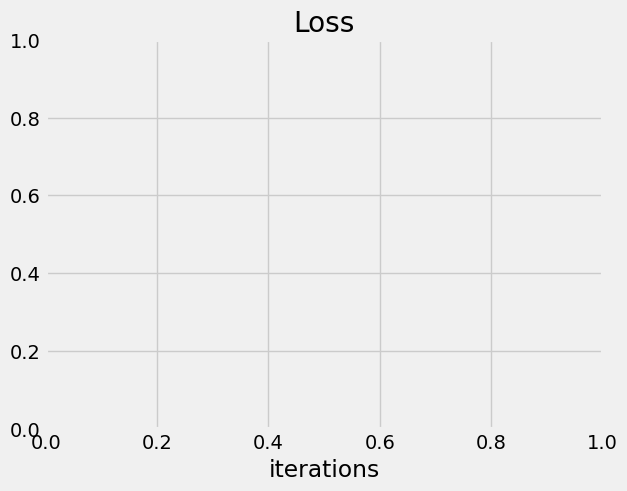

In [9]:
epochs = 20
output = []
losses = []

for epoch in range(epochs):
  for (image,_) in loader:
    image = image.to(device)
    image = image.reshape(-1,28*28)
    out = model(image)
    loss = loss_func(out , image)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss)
  output.append((epochs,loss , out))






In [10]:
print(len(losses))

37500


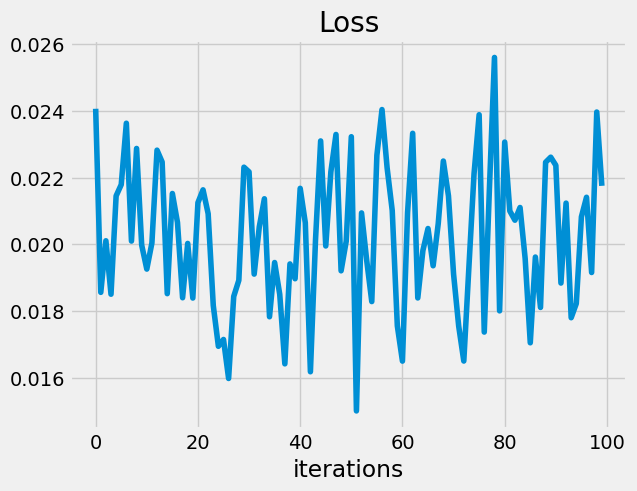

In [14]:
plt.style.use("fivethirtyeight")
plt.xlabel("iterations")
plt.title("Loss")
cpu_losses = [loss.cpu().item() for loss in losses[-100:]]
plt.plot(cpu_losses)

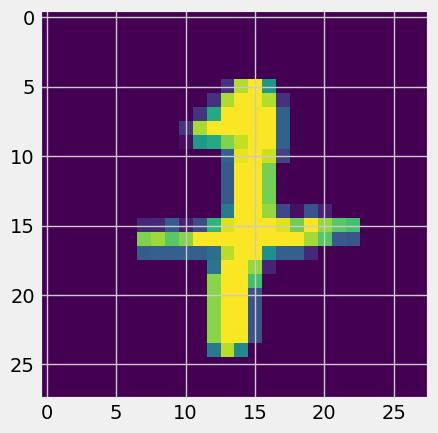

In [20]:
for i , item in enumerate(image):
  item = item.reshape(-1,28,28)
  item1 = item.cpu().detach()
  plt.imshow(item1[0])



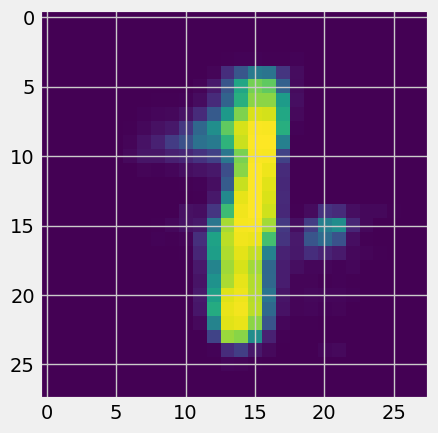

In [21]:
for i , item in enumerate(out):
  item = item.reshape(-1,28,28)
  item = item.cpu().detach()
  plt.imshow(item[0])